<a href="https://colab.research.google.com/github/Mercy-Njambi/Tanzania-Water-Pump-Status/blob/main/Tanzania%20Water%20Pump%20Status%20Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

## 1.1 Business Understanding

Tanzania has a population of 59 million. According to [water.org](https://water.org/our-impact/where-we-work/tanzania/#:~:text=4%20million%20people%20in%20Tanzania,long%20distances%20to%20collect%20water.) 29 million people in Tanzanialack access to improved sanitazation. 4 million people lack access to safe drinking water. According to [UNICEF](https://www.unicef.org/tanzania/what-we-do/wash) as part of its Vision 2025, the Government of Tanzania has pledged to increase access to improved sanitation to 95 per cent by 2025. The Second Five Year Development Plan (FYDP II) has also set the target for access to improved sanitation facilities at 85 percent in rural areas.

Tanzania is trying to improve their water pump maintenance operations in order to ensure that clean, potable water is available to communities across Tanzania. In order to accomplish this, the Government wants to be able to better predict which pumps will fail, and to better identify pumps that need repair and what factors need to be considered in the future. This will help in improving maintenance efficiency and water access, and they have contracted Roots engineering company to make this happen.

## 1.2 Data understanding

The dataset used for this anaysis was downloaded from [DrivenData](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/). The data was was acquired from [Taarifa](https://taarifa.org/) and [Tanzanian Ministry of Water](https://www.maji.go.tz/). The data contains information about wells in Tanzania. The data has three files: training set values, training set labels and test set values.TThe training data has 59,400 rows and 41 columns.The data has the following set of information about the water pumps:
- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered
- funder - Who funded the well
- gps_height - Altitude of the well
- installer - Organization that installed the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- wpt_name - Name of the waterpoint if there is one
- num_private - Private use or not
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- lga - Geographic location
- ward - Geographic location
- population - Population around the well
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- permit - If the waterpoint is permitted
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- quantity - The quantity of water
- quantity_group - The quantity of water
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint


# 2. Data wrangling

## 2.1 Loading libraries and datasets

In [317]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, balanced_accuracy_score, classification_report

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [248]:
# expanding the number of visible columns

pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',100)

In [249]:
# loading the data

data = pd.read_csv('/content/Training set values.csv')
data_labels = pd.read_csv('/content/Training set labels.csv')

In [250]:
# previewing the shape of the data before merging

print(f'Data has {data.shape[0]} rows and {data.shape[1]} columns, while data_labels has {data_labels.shape[0]} rows and {data_labels.shape[1]} columns')

Data has 59400 rows and 40 columns, while data_labels has 59400 rows and 2 columns


The data has similar data in terms of rows, hence can be merged with no loss of data

In [251]:
# merging the data to form one dataframe

df = pd.merge(left = data, right = data_labels, on = 'id')

In [252]:
# previewing the complete dataframe

df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## 2.2 Descriptive statistics

In [145]:
# previewing the shape of the data

print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns')

The data has 59400 rows and 41 columns


In [146]:
# getting the statistics of the numerical columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


## 2.3 Data cleaning

### 2.3.1 Completeness

Before any analysis and preprocessing is done on the data, the data needs to be cleaned in case of any inconsistencies. The first aspect that needs to be checked is whether the data has any missing values.

In [253]:
# checking for null values in the dataset

df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [254]:
# calculating the percentage of missing values

null_values = pd.DataFrame(df.isna().sum()/len(df)*100).rename(columns = {0:'Null Percentage'})
null_values = null_values[(null_values['Null Percentage'] > 0)]
null_values.sort_values(by = 'Null Percentage', ascending = False)

,Null Percentage
scheme_name,47.417508
scheme_management,6.526936
installer,6.153199
funder,6.119529
public_meeting,5.612795
permit,5.144781
subvillage,0.624579


`scheme_name` column has 47% of it's data missing. This means that almost half the rows in this column have no values. This percentage is too high, hence the column needs to be dropped.

In [255]:
# dropping the column 'scheme_name'

df.drop(columns = 'scheme_name', inplace = True)

In [256]:
# previewing the missing columns

df[['scheme_management', 'installer', 'funder', 'public_meeting','permit','subvillage']].head()

,scheme_management,installer,funder,public_meeting,permit,subvillage
0,VWC,Roman,Roman,True,False,Mnyusi B
1,Other,GRUMETI,Grumeti,NaN,True,Nyamara
2,VWC,World vision,Lottery Club,True,True,Majengo
3,VWC,UNICEF,Unicef,True,True,Mahakamani
4,NaN,Artisan,Action In A,True,True,Kyanyamisa


No clear pattern could be found for why the data was missing. So the missing values will be imputed in such a way that the missing values will still indicate that they are missing. It is also worth noting that all the columns with missing values are categorical in nature.

In [257]:
# imputing the missing values

df.fillna(value = 'MISSING', inplace = True)

All the  missing values have been handled, and the data is now complete

### 2.3.2 Uniformity

The next aspect to look into is the uniformity of the data. This check will include looking at the data types of the different columns and ensuring they are are correct.

In [258]:
# checking the column datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59400 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

The columns `date_recorded` has the data types object. This needs to be converted to a date-type data type.

In [259]:
# converting the column's data type

df['date_recorded'] = pd.to_datetime(df['date_recorded'])

In [260]:
# extracting the year from the `date_recorded` column

df['year_recorded'] = df['date_recorded'].dt.year

### 2.3.3 Consistency

The next aspect to look into in whether the data has any duplicates.

In [261]:
# checking for duplicates

print(f'The data has {df.duplicated().sum()} duplicates')

The data has 0 duplicates


Another aspect to look into is if there are columns that are similar. These need to be looked into. it can be noted that some columns have almost the same information, with small disparities.

### `waterpoint_type` vs `waterpoint_type_group`

In [262]:
# checking unique values

df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [263]:
# checking unique values

df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

It can be noted that these columns are similar, except from the fact that `waterpoint_type` has an extra feature called 'Communal Standpipe Multiple' which is a version of the 'Communal Standpipe'. `waterpoint_type_group` can be dropped.

### `source` vs `source_type`

In [264]:
# checking unique values

df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [265]:
# checking unique values

df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

These 2 categories also have similar entries. `source` has divided the borehole listing into the type of motor system used, that is, machine dbh and hand dtw. Also, water pumps getting their source from lakes and rivers have been separated, and also other sources and unknown sources have been separated. These divisions can be combined in this case, and hence, `source_type` can be retained.

In [266]:
# checking unique values

df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

It is also worth noting that `source_class` divides the water sources from where the water comes from. This column will be retained.

### `quantity` vs `quantity_group`

In [267]:
# checking unique values

df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [268]:
# checking unique values

df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

These columns have the same records, so one can be dropped. `quantity_group` can be dropped.

### `water_quality` vs `quality_group`

In [269]:
# checking unique values

df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [270]:
# checking unique values

df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

The two columns have similar entries. `water_quality` has 2 extra columns, with salty divided into salty and salty abandoned, and fluoride divided into fluoride and fluoride abandoned. Also, soft water is classified as good in `quality_group`. One column can be dropped. `quality_group` can be dropped.

### `payment` vs `payment_type`

In [271]:
# checking unique values

df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [272]:
# checking unique values

df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

Both have the same entries, hence one can be dropped. `payment_type` can be dropped.

### `management` vs `scheme_management`

In [273]:
# checking unique values

df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [274]:
# checking unique values

df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
MISSING              3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [275]:
# change entries to lower case for comparison

df['management'] = df['management'].str.lower()
df['scheme_management'] = df['scheme_management'].str.lower()

In [276]:
print('The management and scheme management columns have {} entries that are the same'.format(df.loc[(df['management'] == df['scheme_management'])].shape[0]))
print('The management and scheme management columns have {} entries that are not the same'.format(df.loc[(df['management'] != df['scheme_management'])].shape[0]))

The management and scheme management columns have 49336 entries that are the same
The management and scheme management columns have 10064 entries that are not the same


The two columns have alot of entries that are similar.`management` has two extra columns, unknown and other schools. `scheme_management` had 3,877 entries that were missing. Taking that these columns are similar, `scheme_management` can be dropped, and `management` can be used to represent the management.

### `extraction_type` vs `extraction_type_group` vs `extraction_type_class`

In [277]:
# checking unique values

df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [278]:
# checking unique values

df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [279]:
# checking unique values

df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

The three columns have similar entries for the most part, hence two can be dropped. `extraction_type_class` has generalized the different types better among the 3 columns, hence, will be retained.

### 2.3.4 Validity

Some columns are not important, hence can be dropped, so as to remain with only the necessary columns, as explained above. column `id` can be dropped since it shows that the water pumps are unique. `num_private`indicates whether a water pump is private or not, but the data is not clear, so it can also be dropped.

In [280]:
df.drop(columns = ['waterpoint_type_group', 'source', 'quantity_group', 'quality_group', 
                   'payment_type', 'scheme_management', 'extraction_type', 'id', 
                   'num_private','extraction_type_group'], inplace=True)

Exploring other columns. From the describe table, it can be noted that `longitude` had zero values, which is incorrect for Tanzania, as shown below.Tanzania lies between:
- Latitude : $1^{0}$ S and $10^{0}$S

- Longitude : $30^{0}$ E and $40^{0}$ E

This column needs to be investigated further.

![image.png](attachment:image.png)

In [281]:
# subsetting the longitudes with zero values

df[df['longitude'] == 0.0]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,permit,construction_year,extraction_type_class,management,management_group,payment,water_quality,quantity,source_type,source_class,waterpoint_type,status_group,year_recorded
21,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,MISSING,GeoData Consultants Ltd,False,0,handpump,wug,user-group,unknown,unknown,unknown,shallow well,groundwater,hand pump,functional,2013
53,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,Lake Victoria,Center,Mwanza,19,6,Geita,Nyang'hwale,0,True,GeoData Consultants Ltd,True,0,submersible,vwc,user-group,unknown,unknown,dry,borehole,groundwater,communal standpipe multiple,non functional,2011
168,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,Chinamili,0,False,GeoData Consultants Ltd,False,0,gravity,parastatal,parastatal,other,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional,2013
177,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,Lake Victoria,Mahaha,Shinyanga,17,1,Bariadi,Bunamhala,0,MISSING,GeoData Consultants Ltd,False,0,other,wug,user-group,unknown,soft,enough,shallow well,groundwater,other,non functional,2013
253,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,Lake Victoria,Nyamatala,Mwanza,19,2,Magu,Malili,0,True,GeoData Consultants Ltd,True,0,handpump,vwc,user-group,never pay,soft,insufficient,shallow well,groundwater,hand pump,functional needs repair,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,0.0,2011-07-18,Dwsp,0,DWE,0.0,-2.000000e-08,Wazazo,Lake Victoria,Mwamabuli,Shinyanga,17,1,Bariadi,Mhunze,0,True,GeoData Consultants Ltd,False,0,handpump,wug,user-group,other,soft,enough,shallow well,groundwater,hand pump,functional needs repair,2011
59208,0.0,2013-01-22,Dwsp,0,DWE,0.0,-2.000000e-08,Mtakuja,Lake Victoria,Mbiti,Shinyanga,17,1,Bariadi,Kinang'weli,0,MISSING,GeoData Consultants Ltd,False,0,handpump,wug,user-group,unknown,soft,enough,shallow well,groundwater,hand pump,functional,2013
59295,0.0,2011-07-19,Rwssp,0,DWE,0.0,-2.000000e-08,Maendeleo,Lake Victoria,Mwamalizi,Shinyanga,17,1,Bariadi,Chinamili,0,True,GeoData Consultants Ltd,False,0,handpump,wug,user-group,never pay,soft,enough,shallow well,groundwater,hand pump,functional needs repair,2011
59324,0.0,2013-01-22,World Vision,0,World Vision,0.0,-2.000000e-08,Mwazwilo,Lake Victoria,Mbita,Shinyanga,17,1,Bariadi,Mbita,0,MISSING,GeoData Consultants Ltd,False,0,handpump,wug,user-group,unknown,soft,enough,shallow well,groundwater,hand pump,functional,2013


It can be noted that even latitude has wrong values of close to 0. These columns can be dropped.

In [282]:
# dropping the longitude and latitude rows

df.drop(index = df[df['longitude'] == 0.0].index, inplace = True)

Other columns of interest are `funder` and `installer`.

In [283]:
# calculating the number of unique values

print('Funder columns has {} unique values, while installer column has {}'.format(df['funder'].nunique(),df['installer'].nunique()))

Funder columns has 1859 unique values, while installer column has 2114


These columns have a lot of unique numbers. These need to be reduced down in number. Upon investigation of the columns, some spelling mistakes were discovered. Also, a decision was made to bin the data into the top 15 categories.

In [284]:
# replacing the spelling mistakes in the column

replace_dict = {'District Water Department':'District water department', 'District water depar':'District water department',
 'Distric Water Department':'District water department','FinW':'Fini Water','Fini water':'Fini Water',
 'FINI WATER':'Fini Water','JAICA':'Jaica','COUN':'District council', 'District COUNCIL':'District council', 
 'DISTRICT COUNCIL':'District council','District Counci':'District council','District Council':'District council',
 'Council':'District council','Counc':'District council','District  Council':'District council',
 'Distri':'District council','RC CHURCH':'RC Church', 'RC Churc':'RC Church', 'RC':'RC Church',
 'RC Ch':'RC Church','RC C':'RC Church', 'RC CH':'RC Church','RC church':'RC Church', 'RC CATHORIC':'RC Church',
'Central Government':'Central government','Tanzania Government':'Central government',
'central government':'Central government','Cental Government':'Central government', 'Cebtral Government':'Central government', 
'Tanzanian Government':'Central government','Tanzania government':'Central government', 
'Centra Government' :'Central government','CENTRAL GOVERNMENT':'Central government', 'TANZANIAN GOVERNMENT':'Central government'
 ,'Central govt':'Central government', 'Centr':'Central government', 'Centra govt':'Central government','World vision':'world vision', 
 'World Division':'world vision','World Vision':'world vision', 'Unisef':'Unicef','UNICEF':'Unicef','DANID':'DANIDA', 'Hesawa':'HESAWA',
'Commu':'Community','Communit':'Community','commu':'Community','COMMU':'Community', 'COMMUNITY':'Community',
'GOVERNMENT':'Government', 'GOVER':'Government', 'GOVERNME':'Government', 'GOVERM':'Government','GOVERN':'Government','Gover':'Government',
 'Gove':'Government','Governme':'Government','Governmen':'Government',
'villigers':'villagers', 'villager':'villagers', 'Villagers':'villagers', 'Villa':'villagers', 'Village':'villagers', 'Villi':'villagers',
'Village Council':'villagers','Village Counil':'villagers', 'Villages':'villagers', 'Vill':'villagers', 'Village community':'villagers',
'Villaers':'villagers', 'Village Community':'villagers', 'Villag':'villagers','Villege Council':'villagers', 'Village council':'villagers',
'Village  Council':'villagers','Villagerd':'villagers', 'Villager':'villagers', 'Village Technician':'villagers',
'Village Office':'villagers','Village community members':'villagers', 
'Colonial Government':'Colonial government', 'Government of Misri':'Misri Government', 'Italy government':'Italian government',
'British colonial government':'British government', 'Concern /government':'Concern/Government', 'Village Government':'Village government',
'Government and Community':'Government /Community', 'Cetral government /RC':'RC church/Central Gover',
'Government /TCRS':'TCRS /Government','Government/TCRS':'TCRS /Government','ADRA /Government':'ADRA/Government'}

In [285]:
# replacing the spelling mistakes

df['installer'].replace(replace_dict, inplace = True)

In [286]:
# Creating new dataframe which just picks our desired values

df_1 = df.loc[df['installer']== 'DWE']
df_2 = df.loc[df['installer']== 'Unknown']              
df_3 = df.loc[df['installer']== 'Government'] 
df_4 = df.loc[df['installer']== 'Community'] 
df_5 = df.loc[df['installer']== 'DANIDA'] 
df_6 = df.loc[df['installer']== 'RWE'] 
df_7 = df.loc[df['installer']== 'District council'] 
df_8 = df.loc[df['installer']== 'Central government']
df_9 = df.loc[df['installer']== 'KKKT'] 
df_10 = df.loc[df['installer']== 'HESAWA'] 
df_11 = df.loc[df['installer']== 'TCRS'] 
df_12 = df.loc[df['installer']== 'world vision'] 
df_13 = df.loc[df['installer']== 'CES'] 
df_14 = df.loc[df['installer']== 'Fini Water'] 
df_15 = df.loc[df['installer']== 'RC Church'] 
df_16 = df.loc[df['installer']== 'villagers']
df_17 = df.loc[df['installer']== 'LGA']

df_installer = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,
                          df_13,df_14,df_15,df_16,df_17], ignore_index=True)

In [287]:
df['installer_cat'] = df['installer']

In [288]:
c_ins = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']

# converting the values which has less than 400 value counts to others

df.loc[~df["installer_cat"].isin(c_ins), "installer_cat"] = "Others"

In [289]:
df1 = df.loc[df['funder']== 'Government Of Tanzania']
df2 = df.loc[df['funder']== 'Unknown']              
df3 = df.loc[df['funder']== 'Danida'] 
df4 = df.loc[df['funder']== 'Hesawa'] 
df5 = df.loc[df['funder']== 'Rwssp'] 
df6 = df.loc[df['funder']== 'World Bank'] 
df7 = df.loc[df['funder']== 'Kkkt'] 
df8 = df.loc[df['funder']== 'World Vision']
df9 = df.loc[df['funder']== 'Unicef'] 
df10 = df.loc[df['funder']== 'Tasaf'] 
df11 = df.loc[df['funder']== 'District Council'] 
df12 = df.loc[df['funder']== 'Dhv'] 
df13 = df.loc[df['funder']== 'Private Individual'] 
df14 = df.loc[df['funder']== 'Dwsp'] 
df15 = df.loc[df['funder']== 'Norad'] 
df16 = df.loc[df['funder']== 'Germany Republi']
df17 = df.loc[df['funder']== 'Tcrs']
df18 = df.loc[df['funder']== 'Ministry Of Water']
df19 = df.loc[df['funder']== 'Water']
df20 = df.loc[df['funder']== 'Dwe']

df_funder = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,
                          df13,df14,df15,df16,df17,df18,df19,df20], ignore_index=True)

In [290]:
# To collect values together

df['funder_cat'] = df['funder'] #creating new column

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']
    

df.loc[~df["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

## 2.4 Feature Engineering

From the columns `construction_year` and `date_recorded`, a new column can be created to record the age of the well at the time of audit. This may be a crucial column.

In [291]:
# checking the unique elements in construction year

df['construction_year'].unique()

array([1999, 2010, 2009, 1986,    0, 2011, 1987, 1991, 1978, 1992, 2008,
       1974, 2000, 2002, 2004, 1972, 2003, 1980, 2007, 1973, 1985, 1970,
       1995, 2006, 1962, 2005, 1997, 2012, 1996, 1977, 1983, 1984, 1990,
       1982, 1976, 1988, 1989, 1975, 1960, 1961, 1998, 1963, 1971, 1994,
       1968, 1993, 2001, 1979, 1967, 2013, 1969, 1981, 1964, 1966, 1965])

There are several entries with 0, which need to be imputed.

In [292]:
# finding the median of the 'construction_year' column

df[df['construction_year']>0].median()

amount_tsh              0.000000
gps_height           1154.000000
longitude              36.648187
latitude               -6.064216
region_code            11.000000
district_code           3.000000
population            150.000000
construction_year    2000.000000
year_recorded        2013.000000
dtype: float64

The median of the `construction_year` column is 2000, which can be used to impute the zero values.

In [293]:
# imputing the zero values

df['construction_year'].replace(to_replace=0, value=2000, inplace = True)

In [294]:
# creating a new column for well age

df['well_age'] = df['year_recorded'] - df['construction_year']

In [295]:
# previewing the age values

df['well_age'].unique()

array([12,  3,  4, 27, 11,  2,  0, 26, 20, 33, 19, 39, 13,  7, 41,  8,  5,
       25,  9, 38, 28, 43,  1, 16, 22, 10, 24,  6, 35, 49, 14, 15, 37, 17,
       36, 30, 51, 23, 29, 53, 50, 31, 21, 42, 18, 45, 34, 46, 40, 44, 32,
       48, 47, 52, -4, -2, -7, -5, -1, -3])

In [296]:
# subsetting for values with age less than 0

df[df['well_age'] <0]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,permit,construction_year,extraction_type_class,management,management_group,payment,water_quality,quantity,source_type,source_class,waterpoint_type,status_group,year_recorded,installer_cat,funder_cat,well_age
8729,0.0,2004-05-01,Government Of Tanzania,86,DWE,38.959776,-5.247278,Kwa Bi Shoga,Pangani,Mapojoni Kati,Tanga,4,4,Muheza,Ngomeni,120,True,GeoData Consultants Ltd,True,2008,handpump,vwc,user-group,never pay,salty abandoned,dry,shallow well,groundwater,hand pump,non functional,2004,DWE,Government Of Tanzania,-4
10441,20.0,2004-12-01,Plan Int,307,DDCA,38.768656,-7.298419,Mianzi Primary School,Rufiji,Momboni,Pwani,60,33,Kisarawe,Msanga,1,True,GeoData Consultants Ltd,False,2006,handpump,vwc,user-group,pay per bucket,soft,enough,spring,groundwater,hand pump,non functional,2004,Others,Others,-2
13366,100.0,2004-06-01,Mgaya,1331,Mgaya,34.290885,-1.699609,Maro Mgaya,Lake Victoria,Kibaoni,Mara,20,2,Serengeti,Kenyamonta,80,MISSING,GeoData Consultants Ltd,True,2011,rope pump,other,other,pay per bucket,soft,enough,shallow well,groundwater,hand pump,functional,2004,Others,Others,-7
23373,50.0,2004-03-01,Tasaf And Lga,239,TASAFcitizen and LGA,39.272736,-11.019000,Juhudi,Ruvuma / Southern Coast,Mwanona,Mtwara,90,33,Newala,Luchingu,317,True,GeoData Consultants Ltd,False,2009,gravity,vwc,user-group,pay per bucket,soft,enough,spring,groundwater,communal standpipe multiple,functional,2004,Others,Others,-5
27501,500.0,2004-01-07,Kkkt,1611,villagers,34.900561,-8.873813,Kwa Barnabasi Kilumile,Rufiji,Mlowa,Iringa,11,4,Njombe,Makambako,65,True,GeoData Consultants Ltd,False,2009,handpump,vwc,user-group,pay when scheme fails,soft,enough,borehole,groundwater,hand pump,functional,2004,villagers,Kkkt,-5
32619,0.0,2004-03-01,Caltus,1856,Cultus,31.539761,-7.983106,Kwa Pambajila,Lake Tanganyika,Magomeni,Rukwa,15,4,Sumbawanga Urban,Kasense,900,True,GeoData Consultants Ltd,True,2005,gravity,vwc,user-group,never pay,soft,dry,spring,groundwater,communal standpipe,non functional,2004,Others,Others,-1
33942,0.0,2004-03-01,Amref,-27,AMREF,39.283105,-7.422852,Kwa Ndevu,Rufiji,Gundani,Pwani,6,4,Mkuranga,Magawa,200,True,GeoData Consultants Ltd,False,2007,handpump,vwc,user-group,never pay,soft,seasonal,shallow well,groundwater,hand pump,non functional,2004,Others,Others,-3
39559,0.0,2004-03-06,Tasafu,301,DWE,38.558421,-5.140405,Shuleni,Pangani,Kiwanjani,Tanga,4,2,Korogwe,Kwagunda,713,True,GeoData Consultants Ltd,False,2009,other,vwc,user-group,never pay,soft,dry,shallow well,groundwater,other,non functional,2004,DWE,Others,-5
48555,0.0,2004-12-01,African 2000 Network,284,Karugendo,38.929212,-7.111349,Kauzeni Primary School 2,Wami / Ruvu,Kauzeni Chini,Pwani,60,33,Kisarawe,Kibuta,185,True,GeoData Consultants Ltd,False,2008,gravity,private operator,commercial,never pay,soft,enough,rainwater harvesting,surface,communal standpipe,functional,2004,Others,Others,-4


It can be noted that these rows were recorded even before they were built, which is unlikely, hence, implying an error, hence, these rows can be dropped. It is also worth noting that no imputation was done in these rows under `construction_year`

In [297]:
# dropping the rows with age < 0

df.drop(df[df['well_age'] < 0].index, inplace = True)

In [298]:
# creating bins for the data

bins = [0,10,20,30,40,50,60]

#creating labels for the bins

label = ['0s', '1s', '2s', '3s', '4s', '5s']

In [299]:
# binning the well age column
df['age'] = pd.cut(x = df['well_age'], bins = bins, labels = label)

In [300]:
# previewing the data

df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,permit,construction_year,extraction_type_class,management,management_group,payment,water_quality,quantity,source_type,source_class,waterpoint_type,status_group,year_recorded,installer_cat,funder_cat,well_age,age
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,False,1999,gravity,vwc,user-group,pay annually,soft,enough,spring,groundwater,communal standpipe,functional,2011,Others,Others,12,1s
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,MISSING,GeoData Consultants Ltd,True,2010,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional,2013,Others,Others,3,0s
2,25.0,2013-02-25,Lottery Club,686,world vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,True,2009,gravity,vwc,user-group,pay per bucket,soft,enough,dam,surface,communal standpipe multiple,functional,2013,world vision,Others,4,0s
3,0.0,2013-01-28,Unicef,263,Unicef,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,True,1986,submersible,vwc,user-group,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,non functional,2013,Others,Unicef,27,2s
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,True,2000,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional,2011,Others,Others,11,1s


After feature engineering, some features are now redundant and can now be dropped.

In [301]:
# dropping redundant columns

df.drop(columns = ['date_recorded', 'recorded_by', 'construction_year', 'year_recorded', 'well_age', 'funder', 'installer'], inplace = True)

In [302]:
# saving the cleaned data to a csv

#df.to_csv('Data/Processed/Cleaned Tanzania Water Pump Data.csv')

# 3. Exploratory Data Analysis(EDA)

## 3.1 Does location have an impact on well functionality?

Text(0, 0.5, 'Latitude')

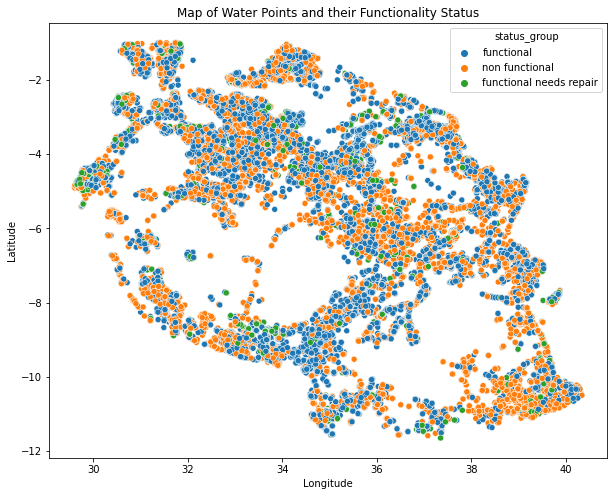

In [197]:
fig, ax = plt.subplots(figsize = (10,8))

sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'status_group')

ax.set_title('Map of Water Points and their Functionality Status')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

#plt.savefig('Images/Map of water points vs status');

It can be noted that there is a cluster of non-functional water points in the south-east area, middle and south-west region. It can also be noted that there are huge open spaces with no water points.

## 3.2 Does water quality affect well functionality?

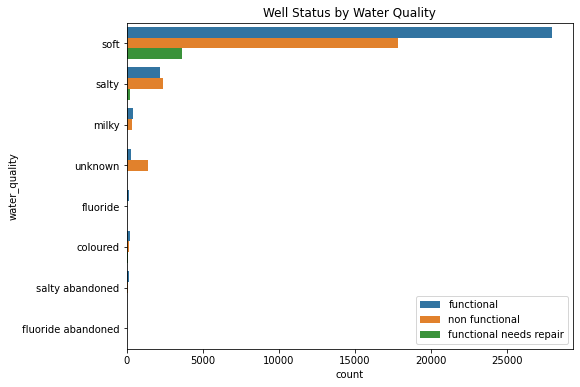

In [198]:
# plotting water quality

fig, ax = plt.subplots(figsize = (8,6))

sns.countplot(data = df, y = 'water_quality', hue = 'status_group', orient = 'h')

ax.set_title('Well Status by Water Quality')
ax.legend(loc = 'lower right')

#plt.savefig('Images/Well status by Water Quality');

It can be noted that most wells have soft water, and most are functional, but also has the highest number of non-functional wells, and also those that need repair.Wells with salty and unknown water quality have higher numbers of non-functional wells as compared to the functional ones.

## 3.3 Does the extraction type affect well functionality?

Text(0, 0.5, 'Type of Water Extraction')

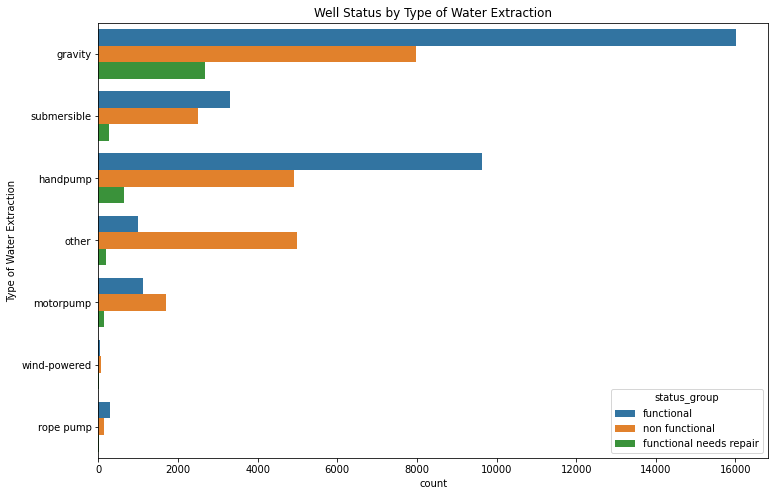

In [199]:
# plotting extraction type vs well functionality

fig, ax = plt.subplots(figsize = (12,8))

sns.countplot(data = df, y= 'extraction_type_class', hue = 'status_group')

ax.set_title('Well Status by Type of Water Extraction')
ax.set_ylabel('Type of Water Extraction')

#plt.savefig('Images/Well Status by Extraction Type');

It can be noted that most wells use `gravity` to extract the water, then followed by a `hand pump`.These 2 methods also have a lot of functional wells, as well as non-functional ones. It can be noted with concern, that `other` means of water extraction has more non-functional than functional ones. The number of non-functional wells in this case is almost tripple that of the functional ones. It can also be noted that under `motor pump`, non-functional wells lead functional ones.

## 3.4 Do different water sources affect well functionality?

Text(0, 0.5, 'Water Source')

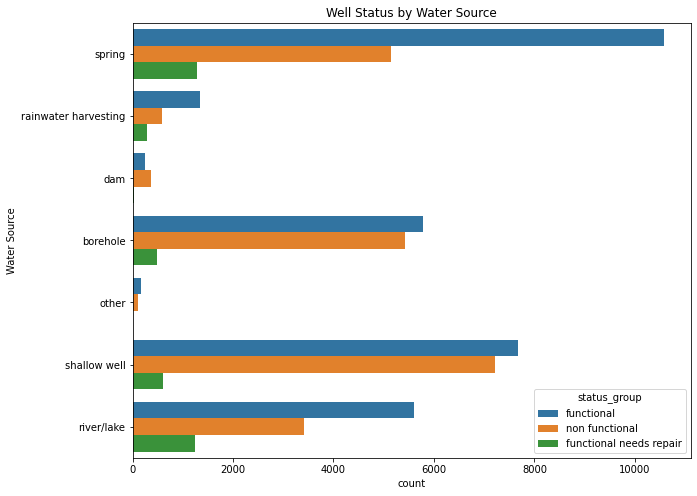

In [200]:
# plotting water sources vs well functionality

fig, ax = plt.subplots(figsize = (10,8))

sns.countplot(data = df, y = 'source_type', hue = 'status_group')

ax.set_title('Well Status by Water Source')
ax.set_ylabel('Water Source')

#plt.savefig('Images/Well Status by Water Source');

It can be noted that `shallow wells` and `borehole` have a very high number of non-functional wells, which are just slightly lower than the number of functional wells.

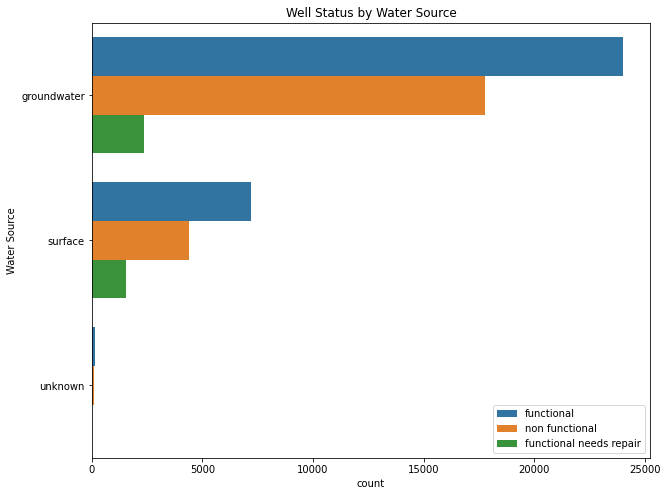

In [201]:
# plotting water sources vs well functionality

fig, ax = plt.subplots(figsize = (10,8))

sns.countplot(data = df, y = 'source_class', hue = 'status_group')

ax.set_title('Well Status by Water Source')
ax.set_ylabel('Water Source')
ax.legend(loc = 'lower right')

#plt.savefig('Images/Well Status by Water Source');

It can be noted that most water pumps are from a `groundwater` source, and very few from `unknown`

An area of interest would be the distribution of the well status

In [202]:
# creating a dataframe of the distribution of the status of the wells

status = pd.DataFrame(df['status_group'].value_counts(normalize = True)*100)
status

,status_group
functional,54.507720
non functional,38.665138
functional needs repair,6.827142


Text(0, 0.5, 'Distribution in Percentage')

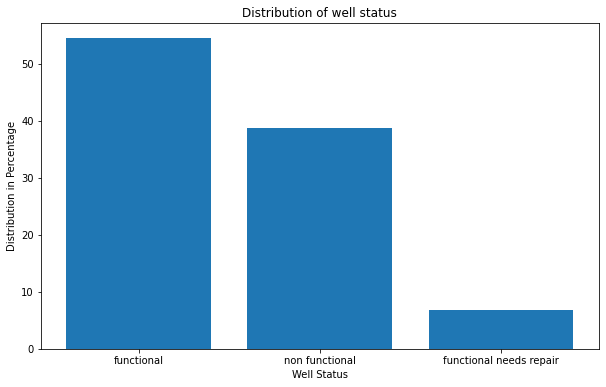

In [203]:
# plotting the distribution of the status of the wells

fig, ax = plt.subplots(figsize = (10,6))

ax.bar(x = status.index, height = status['status_group'])
#dict = {'fontsize':14}

ax.set_title('Distribution of well status')
ax.set_xlabel('Well Status')
ax.set_ylabel('Distribution in Percentage')

#plt.savefig('Images/Distribution of well status');

Most water pumps In Tanzania are functional. There is also a huge number of water pumps that are non-functional, and few that are functional, but need repairs.

## 3.5 Does water quantity affect water point status?

Text(0, 0.5, 'Water Quantity')

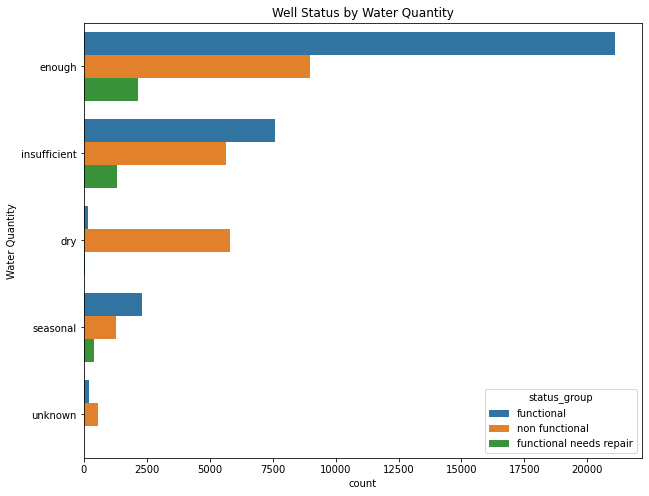

In [204]:
# plotting water quantity vs well functionality

fig, ax = plt.subplots(figsize = (10,8))

sns.countplot(data = df, y = 'quantity', hue = 'status_group')

ax.set_title('Well Status by Water Quantity')
ax.set_ylabel('Water Quantity')

#plt.savefig('Images/Well Status by Water Quantity');

It can be noted that wells with enough supply of water has the highest functioning water points. They also have the largest number of non-functional water points. This may be attributed to their constant use since they always have water.

# 4. Modelling

Before any modelling is done, some pre-processing needs to be done to the data. An aspect to check is the columns, and whether they are suitable for modelling.

In [205]:
# previewing the data

df.head()

,amount_tsh,gps_height,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,permit,extraction_type_class,management,management_group,payment,water_quality,quantity,source_type,source_class,waterpoint_type,status_group,installer_cat,funder_cat,age
0,6000.0,1390,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,False,gravity,vwc,user-group,pay annually,soft,enough,spring,groundwater,communal standpipe,functional,Others,Others,1s
1,0.0,1399,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,MISSING,True,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional,Others,Others,0s
2,25.0,686,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,True,gravity,vwc,user-group,pay per bucket,soft,enough,dam,surface,communal standpipe multiple,functional,world vision,Others,0s
3,0.0,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,True,submersible,vwc,user-group,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,non functional,Others,Unicef,2s
4,0.0,0,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,True,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional,Others,Others,1s


Looking at the dataframe, there are tonnes of redundant columns. The name of the waterpoint(`wpt_name`) is not important for modelling, hence can be dropped.There are so many columns showing location, some can be dropped, and `region`, `latitude` and `longitude` retained to show location.

In [206]:
df.drop(columns = ['wpt_name', 'subvillage', 'lga', 'ward', 'basin', 'region_code', 'district_code', 'management_group'], inplace = True)

In [207]:
#df['status_group'].replace({'functional': 1, 'functional needs repair':0, 'non functional':-1}, inplace = True)

In [208]:
# assigning categorical variables and numerical variables

cat = ['funder_cat', 'installer_cat','public_meeting', 'permit', 'region', 'extraction_type_class', 'management', 'payment', 'water_quality', 'quantity', 'source_type', 'source_class', 'waterpoint_type', 'age']
num = ['amount_tsh', 'gps_height', 'longitude', 'latitude',  'population']

Before any preprocessing is done, data needs to be split into training and test, to prevent data leakage.

In [209]:
# splitting into target and features

features = df.drop(columns = 'status_group')
target = df['status_group']

The data needs to be split into 2; training and testing. Training will be used to train the model and test will be used at the end to test the model.

In [217]:
# splitting data into train and validation

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.3, stratify = target, random_state= 42)

In [218]:
print(f'The X_train data has {X_train.shape[0]} rows and {X_train.shape[1]} columns, while y_train has {y_train.shape[0]} rows')
print(f'The X_val data has {X_val.shape[0]} rows and {X_val.shape[1]} columns, while y_val has {y_val.shape[0]} rows')

The X_train data has 40305 rows and 19 columns, while y_train has 40305 rows
The X_val data has 17274 rows and 19 columns, while y_val has 17274 rows


In [219]:
# previewing the numerical columns

df[num].head()

,amount_tsh,gps_height,longitude,latitude,population
0,6000.0,1390,34.938093,-9.856322,109
1,0.0,1399,34.698766,-2.147466,280
2,25.0,686,37.460664,-3.821329,250
3,0.0,263,38.486161,-11.155298,58
4,0.0,0,31.130847,-1.825359,0


It can be noted that the numerical columns are on different magnitudes, hence, need to be scaled.

In [220]:
# insantiating the scaler

scaler = StandardScaler()

# fitting and transforming it on the train data

scaled_X_train = scaler.fit_transform(X_train[num])

# transforming the validation data

scaled_X_val = scaler.transform(X_val[num])


# converting into a dataframe

scaled_df_train = pd.DataFrame(data = scaled_X_train, columns = X_train[num].columns, index = X_train.index)
scaled_df_val = pd.DataFrame(data = scaled_X_val, columns = X_val[num].columns, index = X_val.index)

The categorical columns need to be label encoded before being used by the models

In [221]:
# one hot encoding for categorical columns

X_train_cat = pd.get_dummies(data = X_train[cat], drop_first=True)
X_val_cat = pd.get_dummies(data = X_val[cat], drop_first=True)


Merging the dataframes to form one dataframe

In [222]:
train_df_preprocessed = pd.merge(scaled_df_train, X_train_cat, left_index=True, right_index=True)
val_df_preprocessed = pd.merge(scaled_df_val, X_val_cat, left_index=True, right_index=True)

In [223]:
val_df_preprocessed.shape

(17274, 118)

The data is now preprocessed and ready for modelling. A baseline model is needed, and then tuned. The models to be used are 
- Decision Trees
- K-Nearest Neighbor
- Random Forest

For the baseline models, the models won't be tuned.
The evaluation metrics to be used are accuracy and balanced accuracy. Balanced accuracy is used to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.

## 4.1 Decision Tree 

In [224]:
# insantiating a decision tree model

baseline = DecisionTreeClassifier(random_state=42)

In [225]:
# fitting the model

baseline.fit(train_df_preprocessed, y_train)

DecisionTreeClassifier(random_state=42)

In [226]:
# creating a function to evealuate the models

def model_evaluation(model, X_train, y_train, X_val, y_val):
    """
    This function evaluates a model's performance using the metrics:
    Accuracy score, balanced accuracy score, classification report, confusion matrix and ROCAUC curve.
    The function takes in 4 parameters:
    model : Model to be evaluated
    X_train, y_train : Training data
    X_val, y_val :Validation data
    The output of this function will be the performance metrics.
    """
    labels = ['functional', 'functional needs repair', 'non functional']
    print(f'The training accuracy score is : {round(accuracy_score(y_train, model.predict(X_train)),3)}')
    print(f'The validation accuracy score is : {round(accuracy_score(y_val, model.predict(X_val)), 3)}')
    print('-------------------------------------------------')
    print(f'The training balanced accuracy score is : {round(balanced_accuracy_score(y_train, model.predict(X_train)), 3)}')
    print(f'The validation accuracy score is : {round(balanced_accuracy_score(y_val, model.predict(X_val)), 3)}')
    print('.................................................')
    print(classification_report(y_val, model.predict(X_val)))
    print('--------------------------------------------------')
    print(plot_confusion_matrix(estimator = model, X = X_val, y_true = y_val,cmap=plt.cm.Blues))

In [227]:
print(train_df_preprocessed.shape)
print(y_train.shape)
print(val_df_preprocessed.shape)

(40305, 118)
(40305,)
(17274, 118)


The training accuracy score is : 1.0
The validation accuracy score is : 0.75
-------------------------------------------------
The training balanced accuracy score is : 1.0
The validation accuracy score is : 0.637
.................................................
                         precision    recall  f1-score   support

             functional       0.80      0.79      0.80      9416
functional needs repair       0.35      0.36      0.35      1179
         non functional       0.75      0.76      0.76      6679

               accuracy                           0.75     17274
              macro avg       0.63      0.64      0.64     17274
           weighted avg       0.75      0.75      0.75     17274

--------------------------------------------------


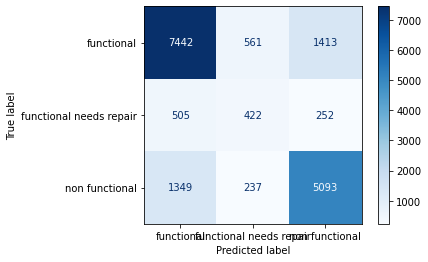

In [228]:
model_evaluation(baseline, train_df_preprocessed, y_train, val_df_preprocessed, y_val)

In [229]:
def plot_feature_importance(model):
    feat_importance = pd.DataFrame(data = model.feature_importances_, index = train_df_preprocessed.columns)
    feat_importance.columns = ['Importance']
    feat_importance.sort_values(by = 'Importance', ascending = True).tail(15).plot(kind='barh',
                                                                                    figsize=(12,10), 
                                                                                    edgecolor = 'black',
                                                                                    color = 'royalblue')
    plt.title("Feature Importance")
    plt.xlabel('Feature Importance')
    plt.ylabel('Features');

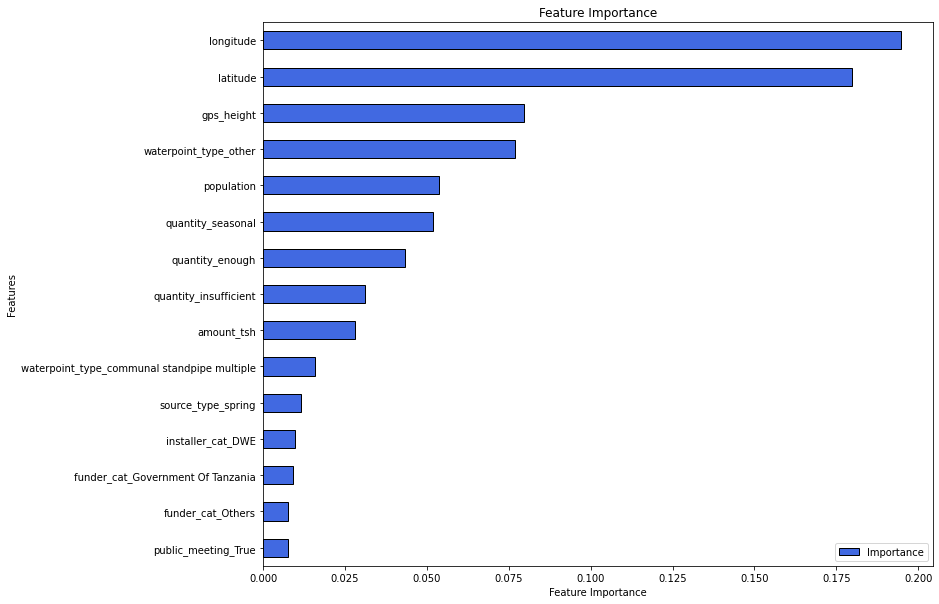

In [230]:
plot_feature_importance(baseline)

As observed from both of the accuracy scores, it is clear this model is overfitting. This is because the validation score is considerably smaller than the training, implying the model is not able to perform on new data. To counter this, hyperparameter tuning would need to take place. Also, it can be noted that location is a key factor for this model. It can also be noted that due to the class imbalance, functional but need repairs has a really f1 score. This is expected since this dataset is highly inbalanced.

In [231]:
# specifying tuning parameters for the baseline model

params = {
            'criterion' : ['gini', 'entropy'],
            'max_depth': [1,10,20],
            'min_samples_leaf' : range(1,10),
            'class_weight' : [None, 'balanced']
        } 

In [232]:
# Instantiating GridSearchCV

dt_grid_search = GridSearchCV(estimator = baseline, 
                              param_grid = params, 
                              cv = 5, 
                              return_train_score = True)

# Fit to the data

dt_grid_search.fit(train_df_preprocessed, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 10, 20],
                         'min_samples_leaf': range(1, 10)},
             return_train_score=True)

In [233]:
# Mean training score
dt_gs_training_score = dt_grid_search.cv_results_['mean_train_score'].mean()

# Mean test score
dt_gs_validation_score = dt_grid_search.score(val_df_preprocessed, y_val)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Validation Score: {dt_gs_validation_score :.2%}")
print(f"Best Parameter Combination Found During Grid Search:{dt_grid_search.best_params_}")

Mean Training Score: 70.63%
Mean Validation Score: 76.33%
Best Parameter Combination Found During Grid Search:{'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 7}


In [234]:
# insantiating the model with the best parameters from grid search

dt_tuned = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=20,
                                 min_samples_leaf=9,
                                 class_weight=None)

# fitting the model to the training data

dt_tuned.fit(train_df_preprocessed, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=9)

The training accuracy score is : 0.825
The validation accuracy score is : 0.768
-------------------------------------------------
The training balanced accuracy score is : 0.688
The validation accuracy score is : 0.619
.................................................
                         precision    recall  f1-score   support

             functional       0.77      0.86      0.82      9416
functional needs repair       0.46      0.27      0.34      1179
         non functional       0.79      0.72      0.76      6679

               accuracy                           0.77     17274
              macro avg       0.68      0.62      0.64     17274
           weighted avg       0.76      0.77      0.76     17274

--------------------------------------------------


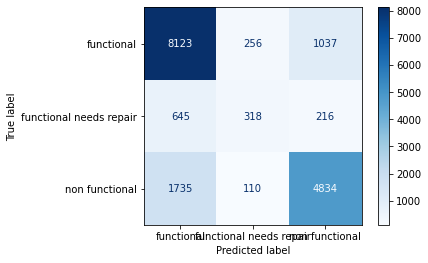

In [235]:
model_evaluation(dt_tuned, train_df_preprocessed, y_train, val_df_preprocessed, y_val)

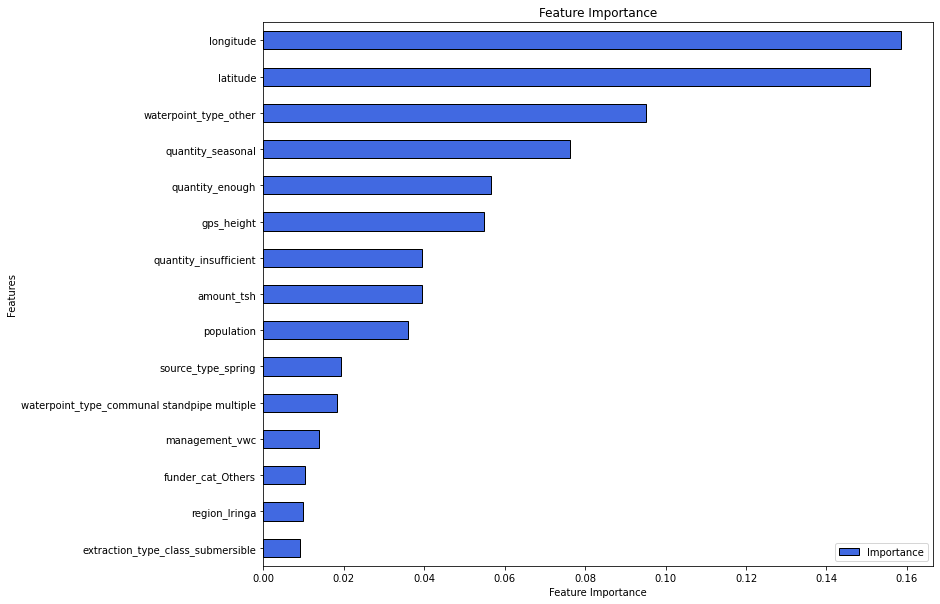

In [236]:
plot_feature_importance(dt_tuned)

It can be noted that the accuracy difference between training and validation got smaller, implying that the model is no longer overfitting. The data imbalance is still a problem for this model, from evaluating the balanced accuracy and the f1 score of the water points that are functional, but need repairs. It can also be noted that location plays a huge role in the status of the water points. The overall accuracy improved from 0.75 to 0.76 after tuning.

Another model that can be used for evaluation is Random Forest. Hyperparameter tuning with GridSearchCV took too long since it is computationally expensive. RandomizedSearchCV is used for the rest of the models onwards.

## 4.2 K-Nearest Neighbors

The training accuracy score is : 0.832
The validation accuracy score is : 0.768
-------------------------------------------------
The training balanced accuracy score is : 0.698
The validation accuracy score is : 0.623
.................................................
                         precision    recall  f1-score   support

             functional       0.77      0.87      0.82      9416
functional needs repair       0.48      0.29      0.36      1179
         non functional       0.79      0.72      0.75      6679

               accuracy                           0.77     17274
              macro avg       0.68      0.62      0.64     17274
           weighted avg       0.76      0.77      0.76     17274

--------------------------------------------------


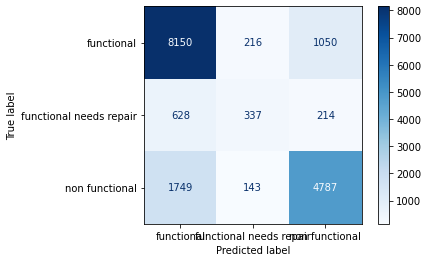

In [237]:
# insantiate a KNN classifier

knn = KNeighborsClassifier()

# fit the model with training data

knn.fit(train_df_preprocessed, y_train)

# evaluating the model
model_evaluation(knn, train_df_preprocessed, y_train, val_df_preprocessed, y_val)

This model has a good accuracy. The model is not overfitting in this case. It can be noted that the class imbalance has also affected this model, as seen from the f1 score.

In [238]:
# specifying tuning parameters

knn_grid = {
    'n_neighbors': [5, 7, 10],
    'metric' : ['minkowski', 'manhattan'],
    'weights': ['uniform', 'distance']
}

In [330]:
# finding the optimal values

knn_random = RandomizedSearchCV(estimator = knn, 
                               param_distributions = knn_grid, 
                               n_iter = 100, 
                               cv = 5,  
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
knn_random.fit(train_df_preprocessed, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'metric': ['minkowski', 'manhattan'],
                                        'n_neighbors': [5, 7, 10],
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [331]:
print(f"Best Parameter Combination Found During Grid Search:{knn_random.best_params_}")

Best Parameter Combination Found During Grid Search:{'weights': 'distance', 'n_neighbors': 10, 'metric': 'manhattan'}


The training accuracy score is : 1.0
The validation accuracy score is : 0.782
-------------------------------------------------
The training balanced accuracy score is : 1.0
The validation accuracy score is : 0.648
.................................................
                         precision    recall  f1-score   support

             functional       0.80      0.86      0.83      9416
functional needs repair       0.51      0.33      0.40      1179
         non functional       0.79      0.75      0.77      6679

               accuracy                           0.78     17274
              macro avg       0.70      0.65      0.67     17274
           weighted avg       0.77      0.78      0.78     17274

--------------------------------------------------


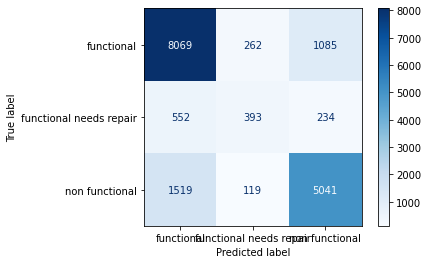

In [332]:
# using the best parameters of knn

knn_tuned = KNeighborsClassifier(weights = 'distance', n_neighbors = 10, metric = 'manhattan')

# fit the model with training data

knn_tuned.fit(train_df_preprocessed, y_train)

# evaluating the model
model_evaluation(knn_tuned, train_df_preprocessed, y_train, val_df_preprocessed, y_val)

The model performed better than the untuned one. The untuned one had an accuracy of 0.77, while the tuned one had an accuracy of 0.78, which is marginally better.

## 4.3 Random Forest

The training accuracy score is : 1.0
The validation accuracy score is : 0.796
-------------------------------------------------
The training balanced accuracy score is : 1.0
The validation accuracy score is : 0.659
.................................................
                         precision    recall  f1-score   support

             functional       0.80      0.87      0.84      9416
functional needs repair       0.50      0.34      0.40      1179
         non functional       0.82      0.77      0.79      6679

               accuracy                           0.80     17274
              macro avg       0.71      0.66      0.68     17274
           weighted avg       0.79      0.80      0.79     17274

--------------------------------------------------


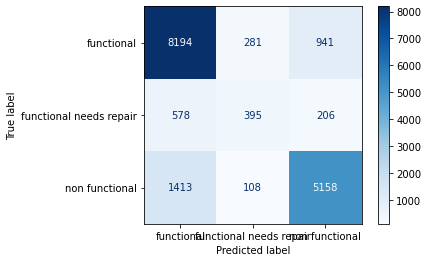

In [303]:
# insantiate random forest classifier

rf = RandomForestClassifier(random_state=42)

# fit the model

rf.fit(train_df_preprocessed, y_train)

# evaluating the model

model_evaluation(rf, train_df_preprocessed, y_train, val_df_preprocessed, y_val)

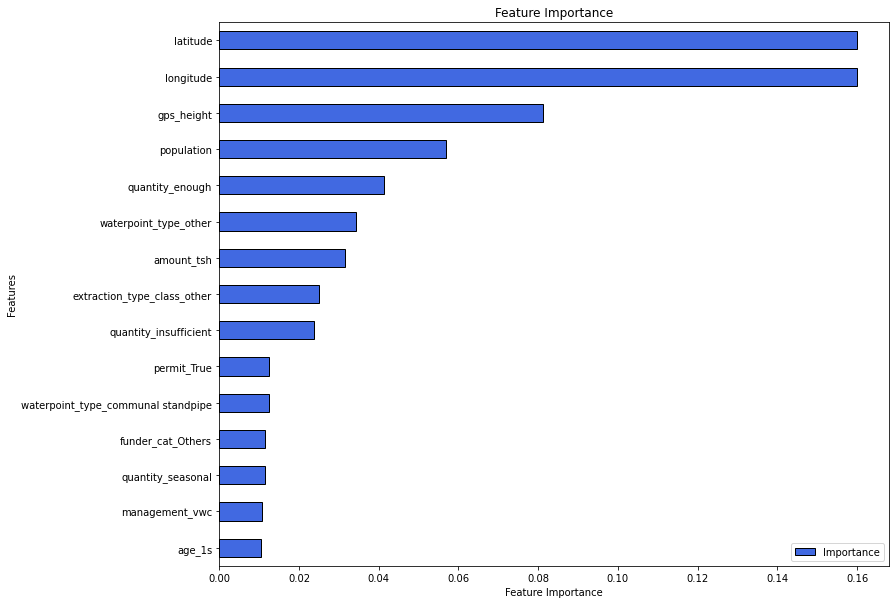

In [304]:
plot_feature_importance(rf)

It can be noted that this model is overfitting due to the difference in accuracies between training and validation. Also, imbalanced dataset is causing a problem to this model. Thsis model has an averall accuracy of 0.8 before tuning.

In [305]:
random_grid = {
               'max_depth': [10, 20],
               'min_samples_split': [5, 10],
               'n_estimators': [500, 1000, 1500]}

In [306]:
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 20, 
                               cv = 5,  
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(train_df_preprocessed, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [500, 1000, 1500]},
                   random_state=42)

In [307]:
# finnding the best parameters

print(f"Best Parameter Combination Found During Grid Search:{rf_random.best_params_}")

Best Parameter Combination Found During Grid Search:{'n_estimators': 1500, 'min_samples_split': 5, 'max_depth': 20}


In [308]:
# using the best parameters to build the model

rf_tuned = RandomForestClassifier(
    n_estimators = 1500,
    min_samples_split=5,
    max_depth=20,
    random_state=42
)

In [309]:
# fitting the model

rf_tuned.fit(train_df_preprocessed, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=1500,
                       random_state=42)

The training accuracy score is : 0.88
The validation accuracy score is : 0.802
-------------------------------------------------
The training balanced accuracy score is : 0.727
The validation accuracy score is : 0.624
.................................................
                         precision    recall  f1-score   support

             functional       0.78      0.93      0.85      9416
functional needs repair       0.71      0.21      0.33      1179
         non functional       0.86      0.73      0.79      6679

               accuracy                           0.80     17274
              macro avg       0.78      0.62      0.65     17274
           weighted avg       0.80      0.80      0.79     17274

--------------------------------------------------


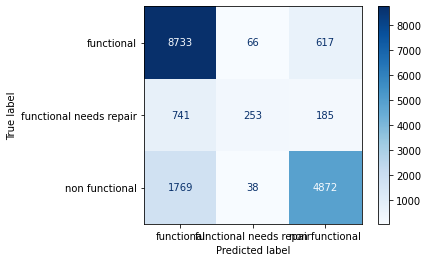

In [310]:
# evaluating the model

model_evaluation(rf_tuned, train_df_preprocessed, y_train, val_df_preprocessed, y_val)

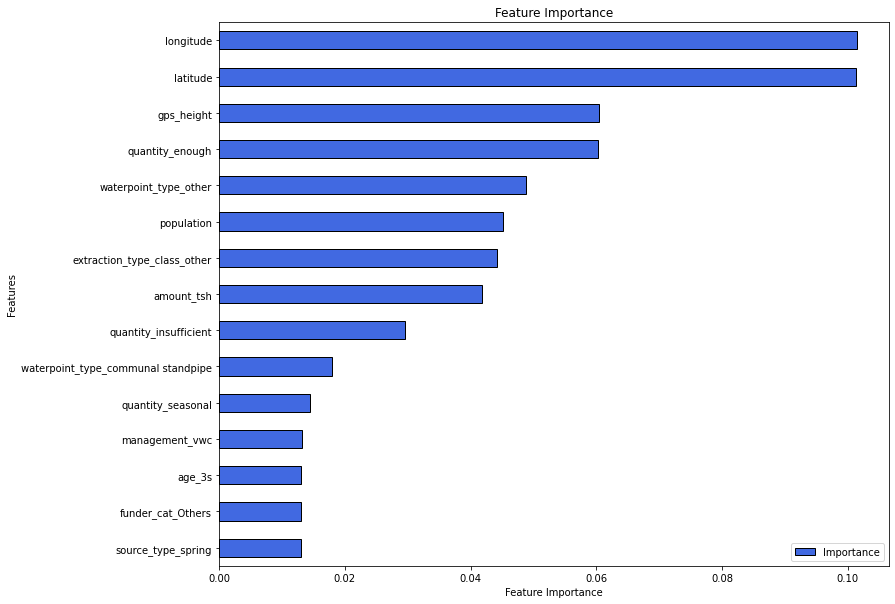

In [311]:
plot_feature_importance(rf_tuned)

This model is doing great, with both training and validation data being close to each other, and at 0.88 and 0.8. This is the best performing model so far. General accuracy is also at 0.8. It can also be noted that location, gps height, enough water quantity and other water water point type are crucial at determing the prediction of a water point. This is the best model, hence will be used as the final model.

## 4.4 Using SMOTE

As seen with the above models using the imbalanced data, the class imblance was causing as seen with the f1 scores of the models. The problem of imbalanced data can be fixed by  using SMOTE. This is an algorithm that generates new sample data by creating 'synthetic' examples that are combinations of the closest minority class cases, in this case, water points that are functional but need repairs.This can be applied to the best performing model.

In [313]:
# #Using SMOTE to remove class imbalances

sm = SMOTE(random_state=42)
# Fit and transform X_t_scaled and y_t using sm
X_train_oversampled, y_train_oversampled = sm.fit_resample(train_df_preprocessed, y_train)

In [314]:
# previewing the new synthetic data

y_train_oversampled.value_counts()

non functional             21969
functional needs repair    21969
functional                 21969
Name: status_group, dtype: int64

The training accuracy score is : 0.914
The validation accuracy score is : 0.766
-------------------------------------------------
The training balanced accuracy score is : 0.914
The validation accuracy score is : 0.71
.................................................
                         precision    recall  f1-score   support

             functional       0.83      0.80      0.81      9416
functional needs repair       0.31      0.58      0.41      1179
         non functional       0.84      0.76      0.79      6679

               accuracy                           0.77     17274
              macro avg       0.66      0.71      0.67     17274
           weighted avg       0.80      0.77      0.78     17274

--------------------------------------------------


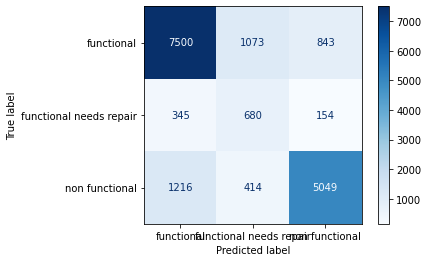

In [315]:
# insantiating the model with the best parameters from grid search
rf_smote = RandomForestClassifier(n_estimators = 1500, 
                                  min_samples_split=5, 
                                  max_depth=20,
                                  random_state=42)

# fitting the model to the oversampled data

rf_smote.fit(X_train_oversampled, y_train_oversampled)

# model evaluation

model_evaluation(rf_smote, X_train_oversampled, y_train_oversampled, val_df_preprocessed, y_val)

This model surprisingly has a lower accuracy than the one with imbalanced data. Another variation of SMOTE can be tried next. SMOTE+TOMEK is such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space. 

In [320]:
# #Using SMOTE to remove class imbalances

sm_tomek = SMOTETomek(random_state=42)
# Fit resample X_train and y_train 

X_train_oversampled2, y_train_oversampled2 = sm_tomek.fit_resample(train_df_preprocessed, y_train)

The training accuracy score is : 0.932
The validation accuracy score is : 0.76
-------------------------------------------------
The training balanced accuracy score is : 0.931
The validation accuracy score is : 0.711
.................................................
                         precision    recall  f1-score   support

             functional       0.83      0.79      0.81      9416
functional needs repair       0.31      0.60      0.40      1179
         non functional       0.83      0.75      0.79      6679

               accuracy                           0.76     17274
              macro avg       0.66      0.71      0.67     17274
           weighted avg       0.79      0.76      0.77     17274

--------------------------------------------------


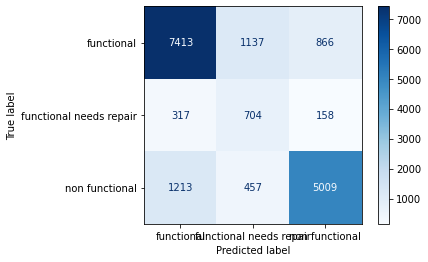

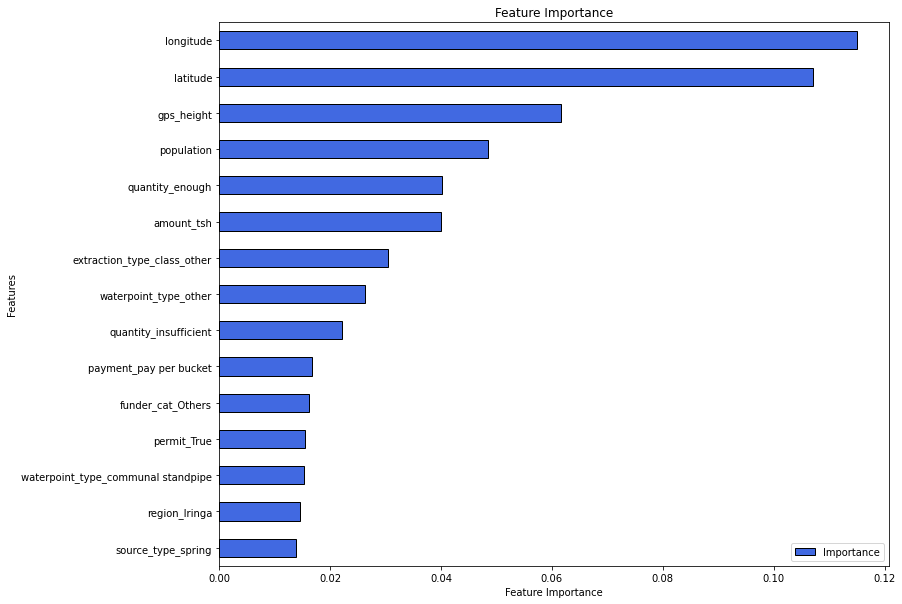

In [321]:
# insantiating the model with the best parameters from grid search
rf_smote_tomek = RandomForestClassifier(n_estimators = 1500, 
                                  min_samples_split=5, 
                                  max_depth=20,
                                  random_state=42)

# fitting the model to the oversampled data

rf_smote_tomek.fit(X_train_oversampled, y_train_oversampled)

# model evaluation

model_evaluation(rf_smote_tomek, X_train_oversampled2, y_train_oversampled2, val_df_preprocessed, y_val)

plot_feature_importance(rf_smote_tomek)

This model is highly overfitting, hence, cannot be used as the final model.The tuned random forest with the unbalanced data has the best accuracy, and less overfitting, so it will be selected as the final model.

# 5. Evaluation

The final model has an accuracy of 0.8. This is a pretty good accuracy, that implies that the model with correctly classify 80% of the features. This model has a training accuracy of 0.88 and 0.8 in testing , which is good.

The model had the highest feature importance on latitude and longitude, which show location. This implies that location information is crucual in predicting the status of the water point. This is further cemented by observing the clusters of non-oprational and functional but needs repairs water points, as was discovered earlier during EDA.

Another factor is gps_height. This is the height of the well. The functioning wells are seen to have high GPS height, while the non-functioning ones having low GPS height. This implies that's areas with low GPS heights at more succeptible to having more water points that need repair or don't function

Text(0.5, 1.0, 'Well Status per GPS Height')

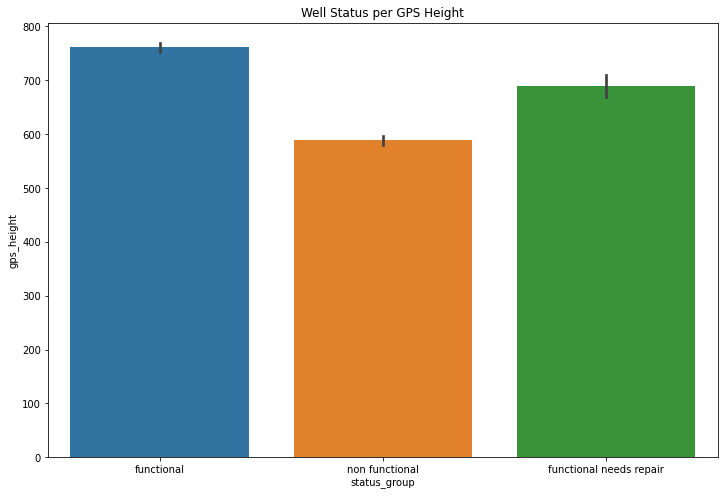

In [329]:
# visualizing the above data

fig, ax = plt.subplots(figsize = (12,8))

ax = sns.barplot(data = df, x = 'status_group', y = 'gps_height')

ax.set_title('Well Status per GPS Height')
#plt.savefig('Images/Top 100 populated wells');

The water points with water quantity that is enough is another aspect that greatly influences well status. Water points with enough water will get a lot of people using them, which may lead to their total failure or some needing repairs. This was also visualized in EDA, and suggested the same information.

Another factor important to the prediction is population around the well. Wells with high population tend to get used a lot, whuch can lead to wear and tear, hence, they need to be observed quite oftenly. As shown below, with a subset of the top 100 most populated wells, most of the wells need repair.

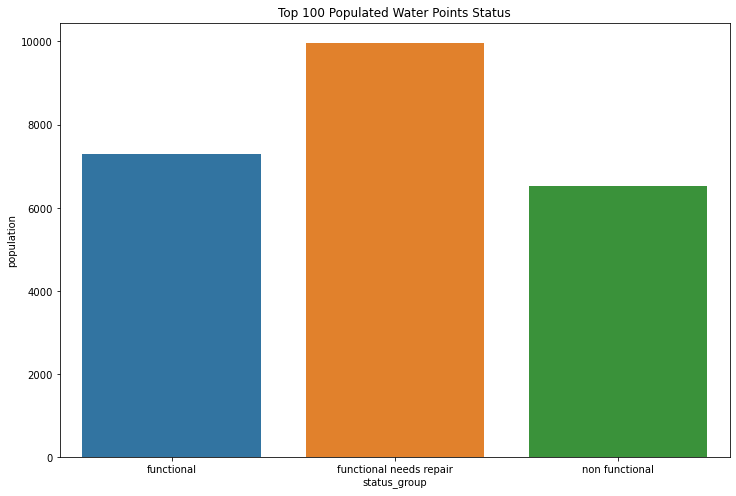

In [ ]:
# subsetting the top 100 water points

pop_max = df[['population', 'status_group']].sort_values(by = 'population', ascending = False).head(100)
pop_max_mean = pop_max.groupby(['status_group'])['population'].mean().reset_index()

# visualizing the above data

fig, ax = plt.subplots(figsize = (12,8))

ax = sns.barplot(data = pop_max_mean, x = 'status_group', y = 'population')

ax.set_title('Top 100 Populated Water Points Status')
#plt.savefig('Images/Top 100 populated wells');

# 6. Conclusions

- The final random forest classifier is suitable for this business case, and is ready for deployment.
- Location is a crucial factor in predicting the status of the water point.
- Water points with enough water are at a higher chance to fail, and should be closely monitored.
- Water points with high population tend to wear out quickly, hence, higher chances of the wells needing repair, or them not functioning.
- Places with low GPS values have higher chances of having water points that need repair or that don't function

# 7. Recommendations

- Water points that are in close proximity to those that need repairs or are non-functional should be accessed frequently since they are most likey to also suffer the fate of needing repair or becoming non-functional.
- Water points with enough water should be closely monitored, as the high use could lead to their failure.
- Water points with high use population should be closely monitored.
- Low lying areas need to be have the water points checked more often to avoid them failing and needing repair